In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import os, re, csv
sns.set()
sns.set_context('talk')
colours = itertools.cycle(sns.color_palette('Set2'))
palettes = itertools.cycle([sns.color_palette('PuBuGn_d'), sns.color_palette('Oranges_d'), sns.color_palette('GnBu_d'), sns.color_palette('Reds_d'), sns.color_palette('Blues_d'), sns.color_palette('PuRd_d')])
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams.update({'figure.autolayout': False})

In [3]:
path = './oxymorons_before_obj/oxymorons_'
corpora = ['coca', 'core', 'time', 'socc']

oxymoron_counts = []

for corpus in corpora:
    for dictionary in ['VAD', 'SWN']:
        f = path + corpus + '_' + dictionary + '_50.csv'
        df = pd.read_csv(f)
        oxymoron_counts.append([corpus.upper(), dictionary, len(df.index)])

In [4]:
with open('oxymoron_counts.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['corpus', 'dictionary', '50percentile_count'])
    for row in oxymoron_counts:
       writer.writerow(row)

# Visualizations

In [5]:
diff_range = [d/10 for d in range(0, 18)]

def plotHistogram(df):
    plt.xlabel('Difference in polarity')
    plt.ylabel('Count of adverbly adjectives')
    sns.distplot(df['diff'], bins=diff_range, kde=False, color=next(colours), hist_kws={'alpha' : 0.8})

## COCA

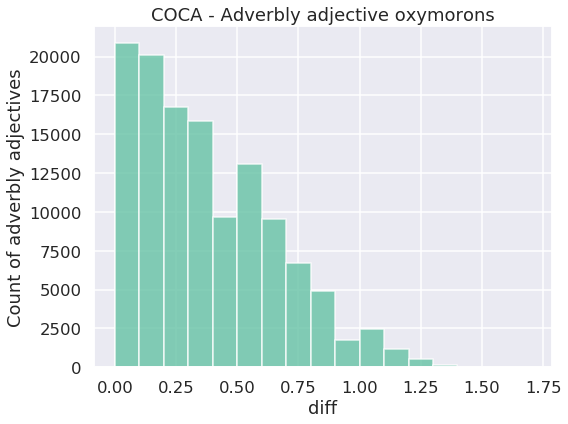

In [6]:
coca = pd.read_csv(path + 'coca.csv', index_col=0)
plotHistogram(coca)
plt.title('COCA - Adverbly adjective oxymorons')
plt.tight_layout()
plt.savefig('oxymorons_coca.png')

## CORE

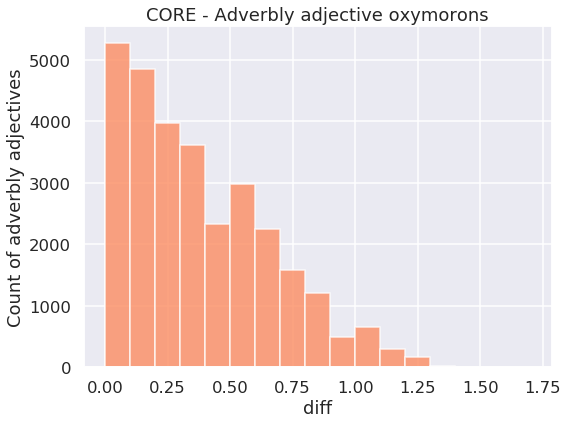

In [7]:
core = pd.read_csv(path + 'core.csv', index_col=0)
plotHistogram(core)
plt.title('CORE - Adverbly adjective oxymorons')
plt.tight_layout()
plt.savefig('oxymorons_core.png')

## TIME

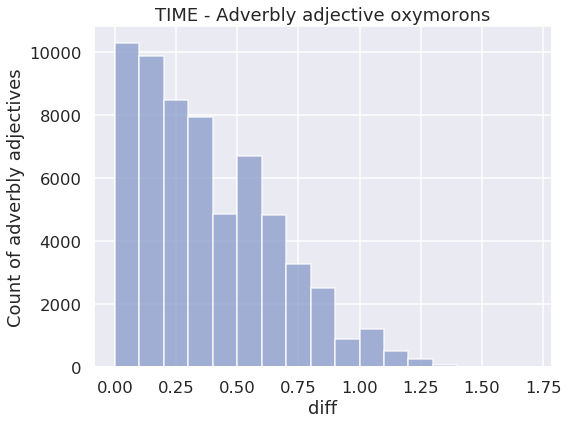

In [8]:
time = pd.read_csv(path + 'time.csv', index_col=0)
plotHistogram(time)
plt.title('TIME - Adverbly adjective oxymorons')
plt.tight_layout()
plt.savefig('oxymorons_time.png')

## SOCC

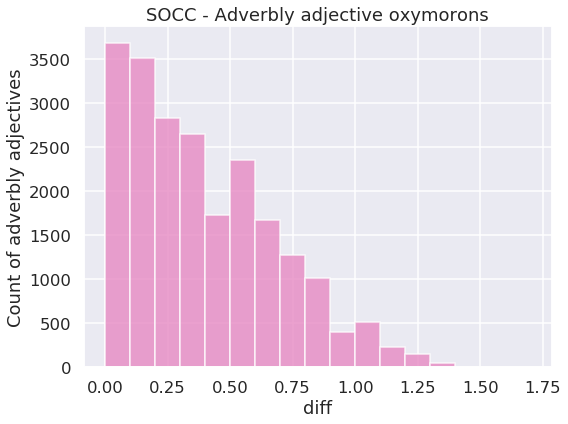

In [9]:
socc = pd.read_csv(path + 'socc.csv', index_col=0)
plotHistogram(socc)
plt.title('SOCC - Adverbly adjective oxymorons')
plt.tight_layout()
plt.savefig('oxymorons_socc.png')